In [30]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

#from utils import decorate, savefig

# I set the random seed so the notebook 
# produces the same results every time.
np.random.seed(17)

# TODO: remove this when NetworkX is fixed
from warnings import simplefilter
import matplotlib.cbook
simplefilter("ignore", matplotlib.cbook.mplDeprecation)
from empiricaldist import Pmf
from empiricaldist import Cdf

In [2]:
def read_graph(filename):
    G = nx.Graph()
    array = np.loadtxt(filename, dtype=int)
    G.add_edges_from(array)
    return G
fb = read_graph('facebook_combined.txt')

In [6]:
def degrees(G):
    return [G.degree(u) for u in G]

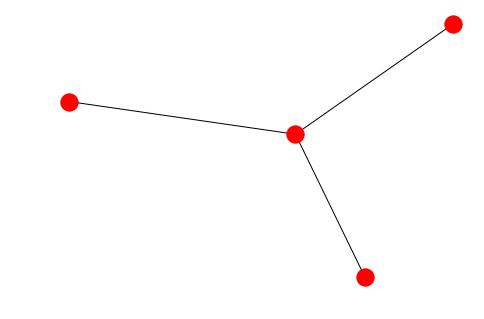

In [4]:
G = nx.Graph()
G.add_edge(0,1)
G.add_edge(0,2)
G.add_edge(0,3)
nx.draw(G)

In [10]:
degrees(G)
#Pmf(degrees(G))
pmf = Pmf.from_seq(degrees(G))
print(pmf)

1    0.75
3    0.25
dtype: float64


In [13]:
pmf_fb = Pmf(degrees(fb))
pmf_fb.mean(), pmf_fb.std()

(348012741, nan)

In [15]:
pmf_fb[1]

17

Text(0, 0.5, 'PMF')

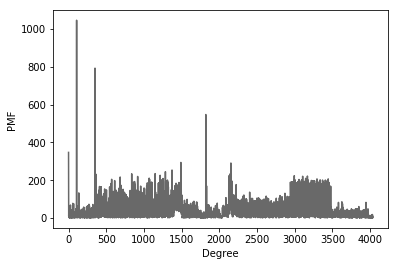

In [29]:
pmf_fb.plot(label='Facebook', color='dimgrey')
plt.xlabel('Degree')
plt.ylabel('PMF')

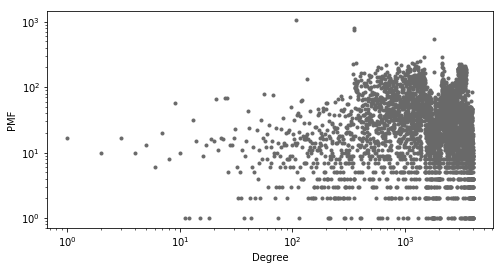

In [28]:
plt.figure(figsize=(8,4))
options = dict(ls='', marker='.')
pmf_fb.plot(label='Facebook', color='dimgrey', **options)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('PMF')
plt.savefig("fb_degree_distribution")

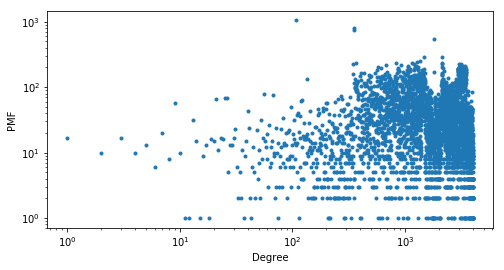

In [27]:
actors = read_graph('actor-movie.dat')
pmf_actors = Pmf(degrees(actors))


plt.figure(figsize=(8,4))
options = dict(ls='', marker='.')
pmf_fb.plot(label='Facebook', color='C0', **options)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('PMF')
plt.savefig("actors_degree_distribution")

In [31]:
def cumulative_prob(pmf, x):
    """Computes the cumulative probability of `x`.
    
    Total probability of all values <= x.
    
    returns: float probability
    """
    ps = [pmf[value] for value in pmf.qs if value<=x]
    return np.sum(ps)

In [33]:
cdf_fb = Cdf.from_seq(degrees(fb), name='Facebook')
cdf_actors = Cdf.from_seq(degrees(actors), name='Actors')

Text(0, 0.5, 'CDF')

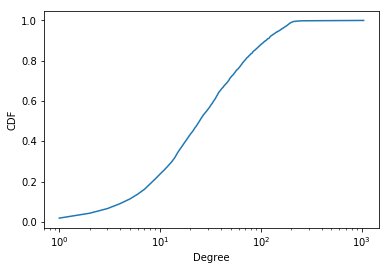

In [39]:
cdf_fb.plot(color='C0')
plt.xlabel('Degree')
plt.xscale('log')
plt.ylabel('CDF')

$\textbf{Exercise 4.2, think complexity}$

In [44]:
print(nx.info(fb))
n= len(fb)
m= (len(fb.edges()))
k = int(round(m/n))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [47]:
hk = nx.powerlaw_cluster_graph(n,k,1.0)
print(nx.info(hk))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88359
Average degree:  43.7529
